In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
csv_cab = pd.read_csv('C:/Users/zgrts/OneDrive/Desktop/DataGlacierCsv/Cab_Data.csv')
csv_city = pd.read_csv('C:/Users/zgrts/OneDrive/Desktop/DataGlacierCsv/City.csv')
csv_customer = pd.read_csv('C:/Users/zgrts/OneDrive/Desktop/DataGlacierCsv/Customer_ID.csv')
csv_transaction = pd.read_csv('C:/Users/zgrts/OneDrive/Desktop/DataGlacierCsv/Transaction_ID.csv')

In [9]:
csv_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [10]:
csv_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [11]:
csv_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
csv_transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
new_csv1 = pd.merge(csv_cab,csv_city)
new_csv2 = pd.merge(csv_customer,csv_transaction)

new_csv = pd.merge(new_csv1,new_csv2)
new_csv1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


Dropped the Date of Travel column because the values doesn't make any sense.

In [14]:
new_csv.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [15]:
new_csv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 359392, dtype: bool

We do not have any duplicated rows

In [16]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [17]:
new_csv['Date of Travel'] = new_csv['Date of Travel'].apply(lambda x:to_date_format(x))

new_csv.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card


In [18]:
months=[]
years =[]
for i in range(len(new_csv['Date of Travel'])):
    months.append(new_csv['Date of Travel'][i].month)
    years.append(new_csv['Date of Travel'][i].year)
new_csv['Month'] = months
new_csv['Year'] = years

new_csv.drop('Date of Travel', axis=1, inplace=True)

new_csv.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card,1,2016


## Now we will check which company had more profit

C:\Users\zgrts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Company', ylabel='count'>

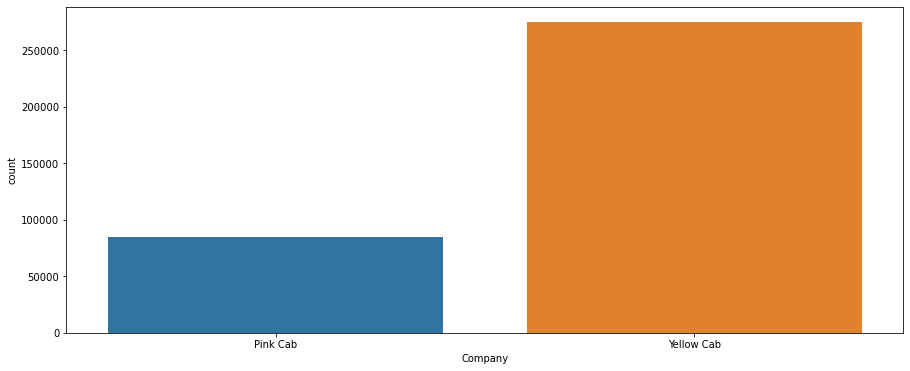

In [19]:
plt.figure(figsize=(15,6))

sns.countplot(new_csv.Company)

There are way too many yellow cabs compared to the pink cabs so, we have to find the profit using average method otherwise we will not get a healthy result

In [20]:
new_csv['Profit'] = new_csv['Price Charged']-new_csv['Cost of Trip']

In [21]:
prc_charge = new_csv.groupby('Company')[['Price Charged']].mean()
cost = new_csv.groupby('Company')[['Cost of Trip']].mean()

profit = prc_charge['Price Charged'] - cost['Cost of Trip']
print(profit)

Company
Pink Cab       62.652174
Yellow Cab    160.259986
dtype: float64


<BarContainer object of 2 artists>

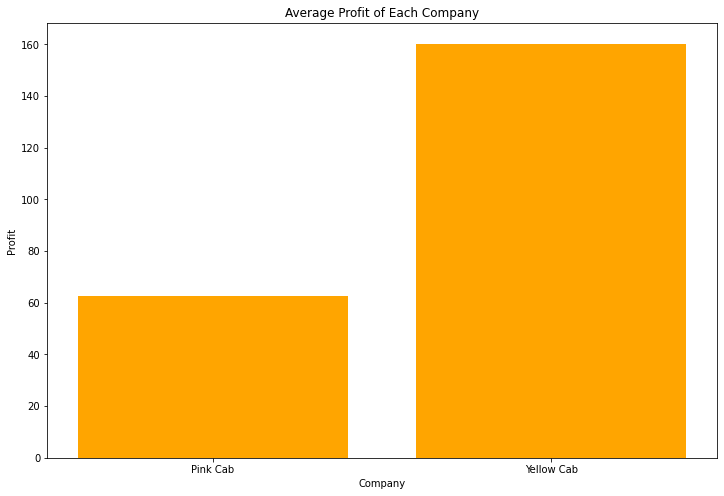

In [22]:
plt.figure(figsize=(12,8))

plt.title('Average Profit of Each Company')
plt.xlabel('Company')
plt.ylabel('Profit')
plt.bar(profit.index,profit,color='orange')

We can see that the Yellow Cab company is approximately 2.5x times more profitable than the Pink Cab company

## City wise average profits from each cab company

In [23]:
new_csv.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year,Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card,1,2016,57.315
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card,1,2016,23.666
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash,1,2016,27.568
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash,1,2016,25.798
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card,1,2016,16.844


In [24]:
temp_csv1 = new_csv.loc[new_csv['Company']=='Yellow Cab']
temp_csv2 = new_csv.loc[new_csv['Company']=='Pink Cab']

prc_charge = temp_csv1.groupby('City')[['Price Charged']].mean()
cost = temp_csv1.groupby('City')[['Cost of Trip']].mean()

prc_charge2 = temp_csv2.groupby('City')[['Price Charged']].mean()
cost2 = temp_csv2.groupby('City')[['Cost of Trip']].mean()

profit = prc_charge['Price Charged'] - cost['Cost of Trip']
profit2 = prc_charge2['Price Charged'] - cost2['Cost of Trip']

print(profit)
print(profit2)

City
ATLANTA GA        128.797723
AUSTIN TX         125.249582
BOSTON MA          61.483619
CHICAGO IL         64.924486
DALLAS TX         195.849415
DENVER CO         146.853175
LOS ANGELES CA    116.656368
MIAMI FL          133.872429
NASHVILLE TN       72.923597
NEW YORK NY       307.864252
ORANGE COUNTY     143.785355
PHOENIX AZ        131.120407
PITTSBURGH PA     107.857716
SACRAMENTO CA      60.021471
SAN DIEGO CA       96.706775
SEATTLE WA         93.428968
SILICON VALLEY    206.788383
TUCSON AZ          71.529258
WASHINGTON DC      82.384912
dtype: float64
City
ATLANTA GA         54.511961
AUSTIN TX          78.932168
BOSTON MA          50.520960
CHICAGO IL         34.047910
DALLAS TX          17.920371
DENVER CO          29.114016
LOS ANGELES CA     56.669120
MIAMI FL           81.069526
NASHVILLE TN       34.918269
NEW YORK NY       108.217540
ORANGE COUNTY      67.412976
PHOENIX AZ         41.199530
PITTSBURGH PA      25.084660
SACRAMENTO CA      41.472273
SAN DIEGO CA      

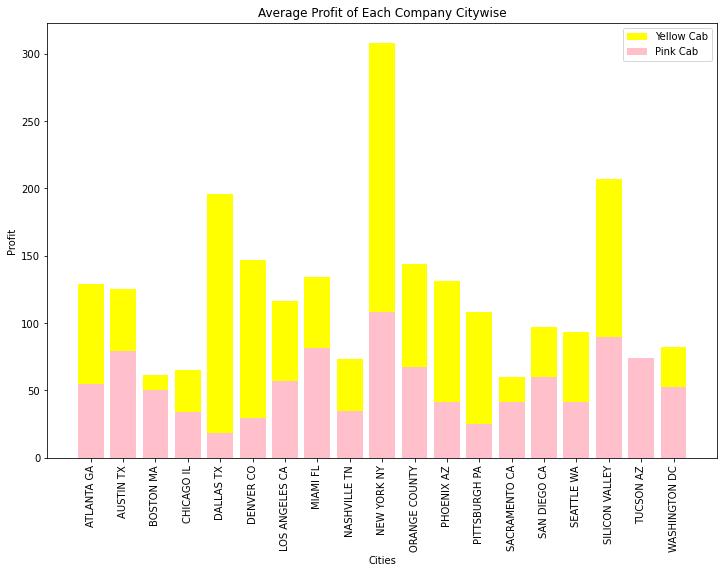

In [25]:
plt.figure(figsize=(12,8))

plt.title('Average Profit of Each Company Citywise')
plt.xlabel('Cities')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.bar(profit.index,profit,color='yellow')
plt.bar(profit2.index,profit2,color='pink')
plt.legend(['Yellow Cab','Pink Cab'])

With looking at this graph, we can come to a conclusion that the Yellow Cab company beats the Pink Cab company profit wise. In addition to that, we can also see that New York and Silicon Valley are two of the best cities that provides the companies with profit.

# Average Profit Per KM

In [26]:
new_csv['ProfitPerKm'] = (new_csv['Price Charged']-new_csv['Cost of Trip'])/(new_csv['KM Travelled'])
new_csv.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year,Profit,ProfitPerKm
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card,1,2016,57.315,1.882266
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card,1,2016,23.666,0.826904
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash,1,2016,27.568,3.049558
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash,1,2016,25.798,0.777751
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card,1,2016,16.844,1.929439


In [27]:
tempX = new_csv.groupby('Company')[['ProfitPerKm']].mean()
print(tempX.ProfitPerKm)

Company
Pink Cab      2.769908
Yellow Cab    7.105508
Name: ProfitPerKm, dtype: float64


<BarContainer object of 2 artists>

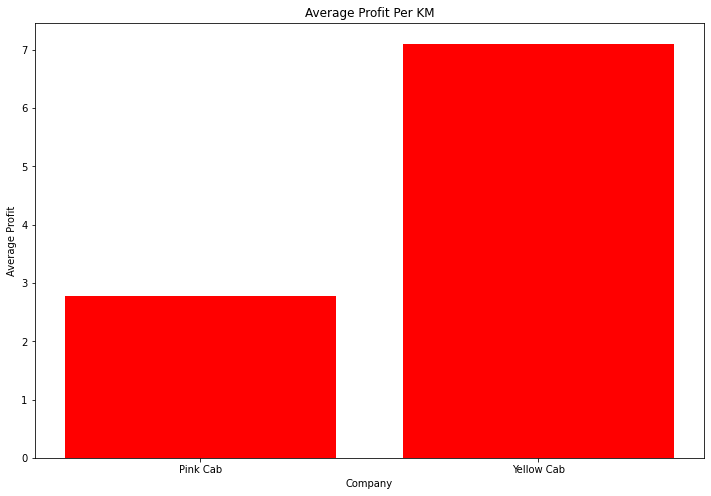

In [28]:
plt.figure(figsize=(12,8))

plt.title('Average Profit Per KM')
plt.xlabel('Company')
plt.ylabel('Average Profit')
plt.bar(tempX.index,tempX.ProfitPerKm,color='red')

## Agewise analysis

In [29]:
print('Number of NaN values present in Age column: '+str(new_csv.Age.isnull().sum()))

Number of NaN values present in Age column: 0


In [30]:
temp_csv1 = new_csv.loc[new_csv['Company']=='Yellow Cab']
temp_csv2 = new_csv.loc[new_csv['Company']=='Pink Cab']

prc_charge = temp_csv1.groupby('Age')[['Price Charged']].mean()
cost = temp_csv1.groupby('Age')[['Cost of Trip']].mean()

prc_charge2 = temp_csv2.groupby('Age')[['Price Charged']].mean()
cost2 = temp_csv2.groupby('Age')[['Cost of Trip']].mean()

profit = prc_charge['Price Charged'] - cost['Cost of Trip']
profit2 = prc_charge2['Price Charged'] - cost2['Cost of Trip']

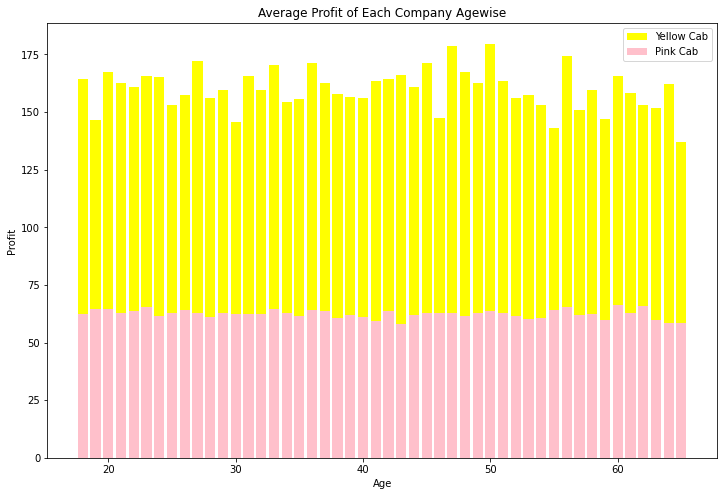

In [31]:
plt.figure(figsize=(12,8))

plt.title('Average Profit of Each Company Agewise')
plt.xlabel('Age')
plt.ylabel('Profit')
plt.bar(profit.index,profit,color='yellow')
plt.bar(profit2.index,profit2,color='pink')
plt.legend(['Yellow Cab','Pink Cab'])

We can see that age does not really affect the profits if the person is not extremely old. We already knew that Yellow Cab company had more profit but we have made the inference that the age is not a big factor that contributes in the profit.

In [68]:
bins=[18,29,40,69]
labels = ['young','middle aged','old']

new_csv['Age Range'] = pd.cut(new_csv.Age,bins=bins,labels=labels)
new_csv.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year,Profit,ProfitPerKm,Season,Income Status,Age Range
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card,1,2016,57.315,1.882266,Winter,wealthy,young
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card,1,2016,23.666,0.826904,Winter,wealthy,young
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash,1,2016,27.568,3.049558,Winter,wealthy,old
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash,1,2016,25.798,0.777751,Winter,wealthy,young
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card,1,2016,16.844,1.929439,Winter,wealthy,middle aged


In [78]:
temp = new_csv.groupby('Age Range')[['Transaction ID']].count()

temp.head()

,Transaction ID
Age Range,
young,128021
middle aged,124271
old,96254


([<matplotlib.patches.Wedge at 0x1e53a650940>,
 [Text(0.46565540265963234, 1.0515060846109716, 'young'),
  Text(-1.1031800754749743, -0.32479796962886043, 'middle aged'),
  Text(0.7436772205090605, -0.8771796803938853, 'old')],
 [Text(0.22270475779373722, 0.5028942143791603, '36.7%'),
  Text(-0.5276078621836834, -0.15533815938771584, '35.7%'),
  Text(0.3556717141565071, -0.41952071671011903, '27.6%')])

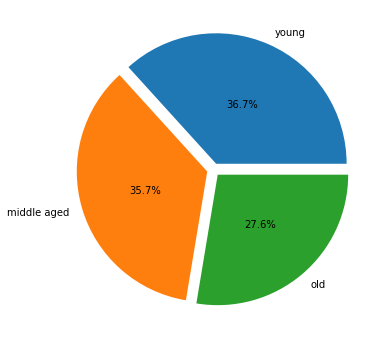

In [89]:
pie, ax = plt.subplots(figsize=[10,6])

labels = temp.index
plt.pie(x=temp['Transaction ID'],autopct="%.1f%%",labels=labels,explode=(0.05,0.05,0.05), pctdistance=0.5)

## Inference:

We can see that mostly young aged and middle aged customers take the drive while young customers count are more.Also, old people are taking the drive less than others.

## Let's examine how the number of drives change on certain season of the year

In [32]:
Season = []

def findSeason(index):
    if new_csv.Month[index] == 1 or new_csv.Month[index] == 2 or new_csv.Month[index] == 12:
        Season.append('Winter')
    elif new_csv.Month[index] == 3 or new_csv.Month[index] == 4 or new_csv.Month[index] == 5:
        Season.append('Spring')
    elif new_csv.Month[index] == 6 or new_csv.Month[index] == 7 or new_csv.Month[index] == 8:
        Season.append('Summer')
    else:
        Season.append('Fall')

for i in range(len(new_csv.Month)):
    findSeason(i)

new_csv['Season'] = Season

C:\Users\zgrts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zgrts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Pink Cab Company Season Comparison'}, xlabel='Season', ylabel='count'>

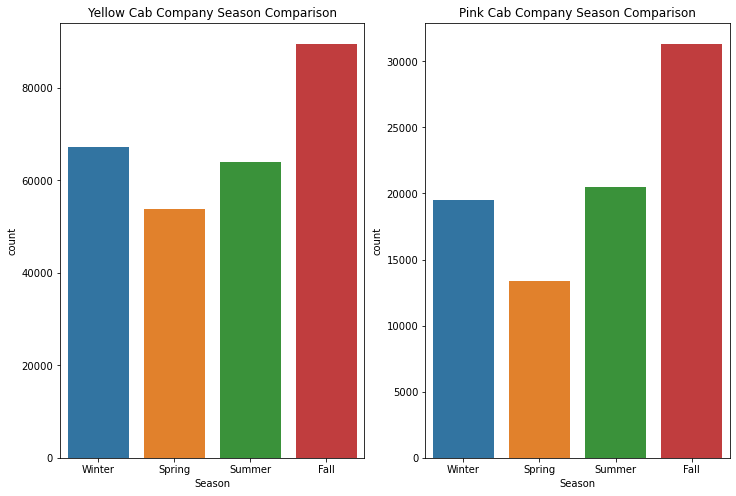

In [33]:
temp_csv1 = new_csv.loc[new_csv['Company']=='Yellow Cab']
temp_csv2 = new_csv.loc[new_csv['Company']=='Pink Cab']

#sirkete gore ayir sonra hangi sezonda ne kadar sefer yazilmis countunu bul.
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title('Yellow Cab Company Season Comparison')
sns.countplot(temp_csv1.Season)

plt.subplot(1,2,2)
plt.title('Pink Cab Company Season Comparison')
sns.countplot(temp_csv2.Season)

## Inference

We can see that in two of the companies Fall season is the most active season in terms of cab users. Also we can see that Spring season is the least active season.

## Companies profit changes throughout years

In [34]:
def YearlyProfit(data):
    tempX =  data.groupby('Year')[['Price Charged']].mean()
    tempY =  data.groupby('Year')[['Cost of Trip']].mean()
    
    return tempX['Price Charged'] - tempY['Cost of Trip']

YellowCabYearly = YearlyProfit(temp_csv1)
PinkCabYearly = YearlyProfit(temp_csv2)

print(YellowCabYearly,PinkCabYearly)

Year
2016    169.693701
2017    168.416894
2018    143.450759
dtype: float64 Year
2016    68.810861
2017    66.714142
2018    53.124295
dtype: float64


<BarContainer object of 3 artists>

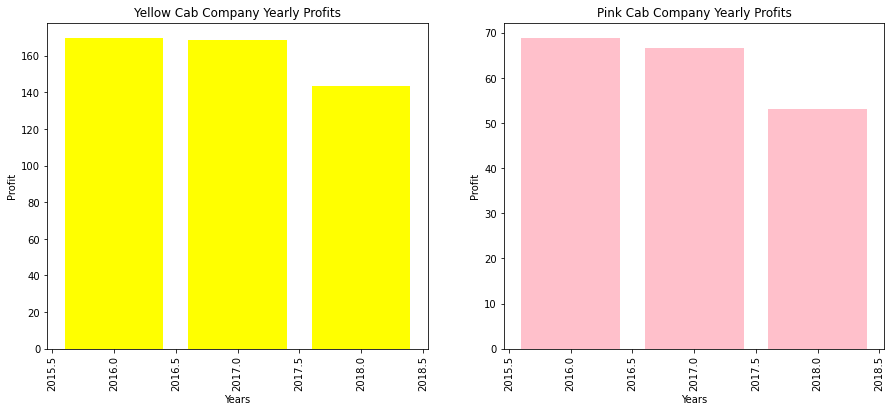

In [35]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Profit')
plt.title('Yellow Cab Company Yearly Profits')
plt.bar(YellowCabYearly.index,YellowCabYearly,color='yellow')

plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Profit')
plt.title('Pink Cab Company Yearly Profits')
plt.bar(PinkCabYearly.index,PinkCabYearly,color='pink')

## Inference

From this graph we can see that both Yellow and Pink Cab companies have lost a slim profit from 2016 to 2017 while Pink Cab companys profit loss is slightly more. We can also see that from 2017 to 2018 there is a significant amount of loss in both companies and loss margin is almost identical.

## Analysis based on KM traveled

C:\Users\zgrts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM Travelled', ylabel='count'>

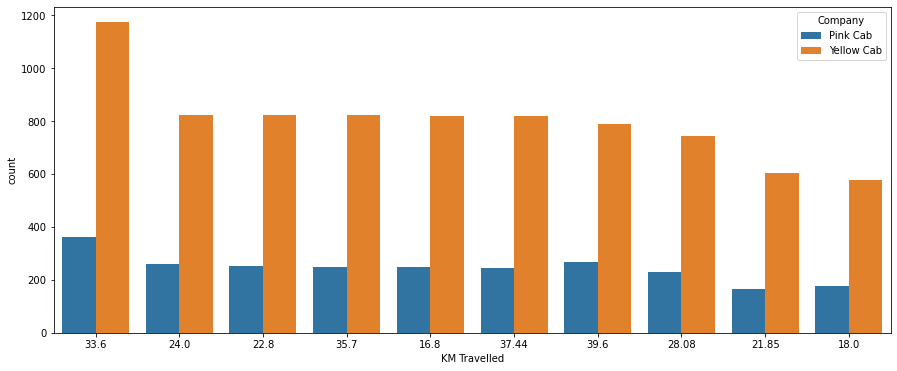

In [36]:
plt.figure(figsize=(15,6))

sns.countplot(new_csv['KM Travelled'],order = new_csv['KM Travelled'].value_counts().iloc[:10].index,hue=new_csv['Company'])

## Inference

Here, we can see the top 10 most used travel values. We can see that mostly, customers prefer to travel 20 to 30 KM's.

## Income wise analysis

In [63]:
bins=[0,2500,7500,30000]
labels = ['poor','mid','wealthy']

new_csv['Income Status'] = pd.cut(new_csv['Income (USD/Month)'],bins=bins,labels=labels)
new_csv.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year,Profit,ProfitPerKm,Season,Income Status
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card,1,2016,57.315,1.882266,Winter,wealthy
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card,1,2016,23.666,0.826904,Winter,wealthy
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash,1,2016,27.568,3.049558,Winter,wealthy
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash,1,2016,25.798,0.777751,Winter,wealthy
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card,1,2016,16.844,1.929439,Winter,wealthy


In [64]:
new_csv['Income Status'].isnull().sum()

16563

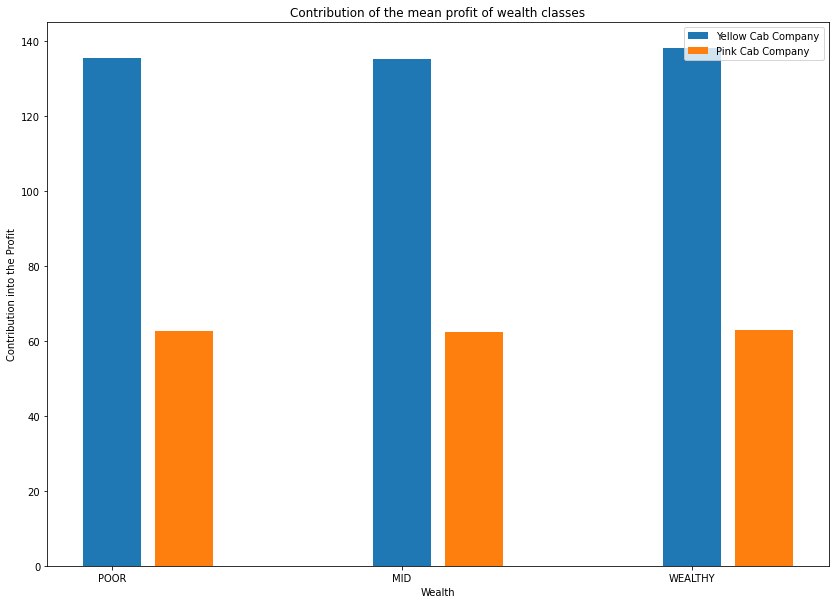

In [62]:
temp_csv1 = new_csv.loc[new_csv['Company']=='Yellow Cab']
temp_csv2 = new_csv.loc[new_csv['Company']=='Pink Cab']

temp = new_csv.groupby('Income Status')[['Profit']].mean()
temp2 = temp_csv2.groupby('Income Status')[['Profit']].mean()

X = np.arange(len(temp.index))

plt.figure(figsize=(14,10))

plt.xlabel('Wealth')
plt.ylabel('Contribution into the Profit')
plt.title('Contribution of the mean profit of wealth classes')
plt.bar(X+0.25,temp.Profit,width=0.2,label = 'Yellow Cab Company')
plt.bar(X+0.5,temp2.Profit,width=0.2,label = 'Pink Cab Company')
plt.xticks([i + 0.25 for i in range(3)], ['POOR', 'MID', 'WEALTHY'])
plt.legend()

## Inference

We can see that almost all wealth classes contribute the same to the profit when we take the classes means.

<AxesSubplot:xlabel='Payment_Mode', ylabel='Profit'>

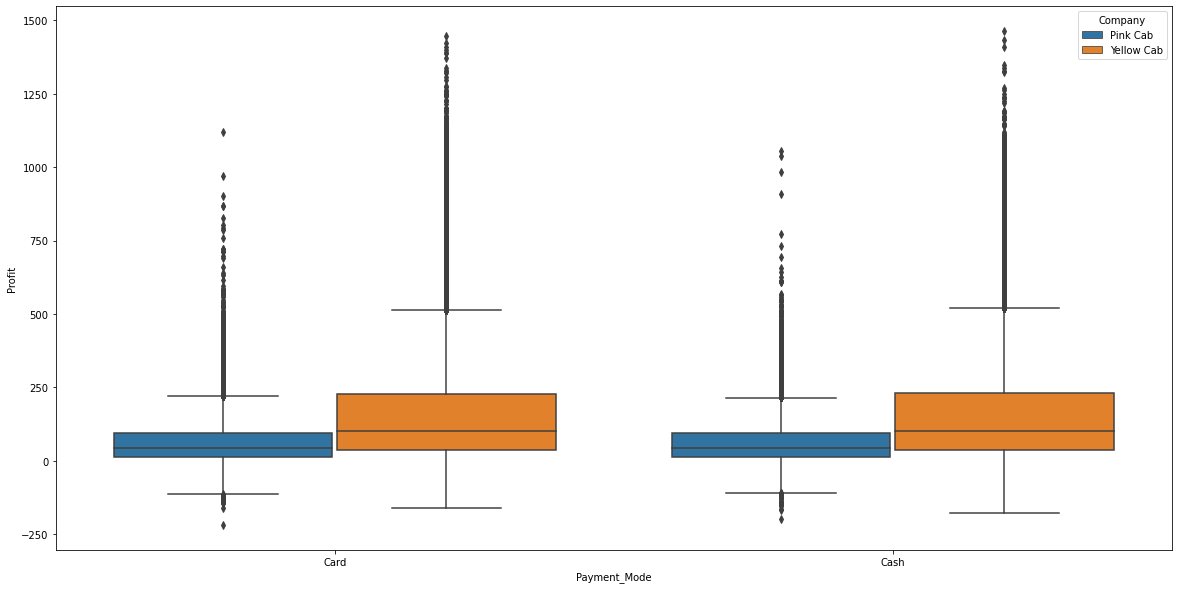

In [43]:
plt.figure(figsize=(20,10))

sns.boxplot(y=new_csv.Profit,x=new_csv.Payment_Mode,hue=new_csv.Company)

## Inference:

From this graph, we can see that almost equal number of profits have been made from both payment modes. Company wise, of course Yellow Cab Company has made more profit for each of the payment modes than the Pink Cab Company

## Hyphotesis Testing

Hyphotesis one: Females bring less profit than Man

In [91]:
f_Profit = new_csv[(new_csv.Gender=='Female')&(new_csv.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
m_Profit = new_csv[(new_csv.Gender=='Male')&(new_csv.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(f_Profit.shape[0],m_Profit.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(f_Profit.values,m_Profit.values,equal_var=True)
if(p_value > 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternative hypothesis')
    
print('P value is ', p_value)

116000 158681
Accept alternative hypothesis
P value is  6.060473042494144e-25


In [95]:
f_Profit = new_csv[(new_csv.Gender=='Female')&(new_csv.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
m_Profit = new_csv[(new_csv.Gender=='Male')&(new_csv.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(f_Profit.shape[0],m_Profit.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(f_Profit.values,m_Profit.values,equal_var=True)
if(p_value > 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternative hypothesis')
    
print('P value is ', p_value)

37480 47231
Accept null hypothesis
P value is  0.11515305900425798


Hyphotesis two: Does profit/margins change depending on gender of customer?

In [94]:
m = new_csv[(new_csv.Gender=='Male')&(new_csv.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
f = new_csv[(new_csv.Gender=='Female')&(new_csv.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(m.shape[0],f.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(m.values,b=f.values,equal_var=True)
if(p_value<0.05):
    print('Accept alternative hypothesis')
else:
    print('Accept null hypothesis')
    
print('P value is ', p_value)

158681 116000
Accept alternative hypothesis
P value is  6.060473042494144e-25


In [96]:
m = new_csv[(new_csv.Gender=='Male')&(new_csv.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
f = new_csv[(new_csv.Gender=='Female')&(new_csv.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(m.shape[0],f.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(m.values,b=f.values,equal_var=True)
if(p_value<0.05):
    print('Accept alternative hypothesis')
else:
    print('Accept null hypothesis')
    
print('P value is ', p_value)

47231 37480
Accept null hypothesis
P value is  0.11515305900425798


Hyphotesis three: The mean Profit for the different Age groups for Yellow Cab are equal.

In [98]:
young = new_csv[(new_csv['Age Range'] == 'young')&(new_csv.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
middle_aged = new_csv[(new_csv['Age Range'] == 'middle aged')&(new_csv.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
old = new_csv[(new_csv['Age Range'] == 'old')&(new_csv.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()


In [99]:
from scipy.stats import f_oneway

stat, p = f_oneway(young.values, middle_aged.values, old.values)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('There is no difference in Profit due to Age')
else:
    print('There is a difference in Profit due to Age')
     

stat=1.030, p=0.357
There is no difference in Profit due to Age


In [ ]:
young = new_csv[(new_csv['Age Range'] == 'young')&(new_csv.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
middle_aged = new_csv[(new_csv['Age Range'] == 'middle aged')&(new_csv.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
old = new_csv[(new_csv['Age Range'] == 'old')&(new_csv.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

In [100]:
from scipy.stats import f_oneway

stat, p = f_oneway(young.values, middle_aged.values, old.values)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('There is no difference in Profit due to Age')
else:
    print('There is a difference in Profit due to Age')
     

stat=1.030, p=0.357
There is no difference in Profit due to Age
